# Phase 3 - Segmentation:
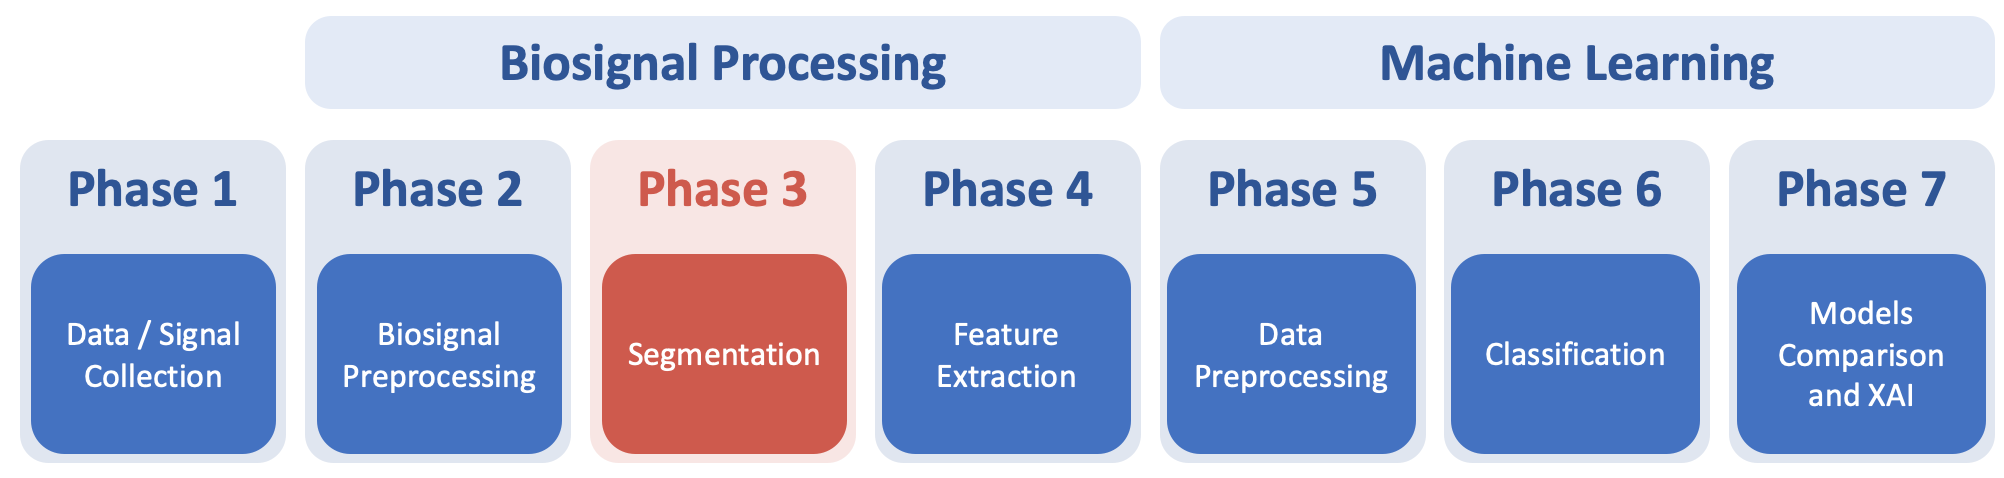

### Introduction: 
- The dataset contains 3240 samples (Normal and Abnormal PCG signals) in an audio form (.wav) with a length between 5 to 35 seconds. 
- When applying a sampling rate of 1000 Hz, the signals length varies between (5000 to 35000 samples).
- Segmentation is used to slice the signals to a specific length, so that all signals are equal in length and therefore the number of samples per signals are equal.

### Objective:
The objective of this phase is to increase the dataset by slicing all signals to 5000 samples with respect to its class.

### Notes:
- All the functions and variables, which are used in this notebook, are imported from helps.py file from the signal_processing package in the same repository.
- audio_index[0] is a normal PCG Signal.
- audio_index[51] is an abnormal PCG Signal.

In [1]:
import pandas as pd
from glob import glob
import constants as c
from signal_preprocessing.helpers import *

### Loading the audio files and references:

In [2]:
# Loading all the audio files in one list:
folders = ['a', 'b', 'c', 'd', 'e', 'f']

audio_files = []
for folder in folders:
    audio = glob(f'/Users/mohammedlajam/Documents/GitHub/Datasets/Phonocardiogram/PhysioNet_2016/training-{folder}/*.wav')
    audio_files.append(audio)
audio_files = [item for elem in audio_files for item in elem]

# Loading the references:
references = []
for folder in folders:
    csv_file = pd.read_csv(f'/Users/mohammedlajam/Documents/GitHub/Datasets/Phonocardiogram/PhysioNet_2016/training-{folder}/REFERENCE.csv', header=None)
    references.append(csv_file)
references = pd.concat(references, ignore_index=True)
references.columns = ['signal_id', 'class']

# 1. Signal Preprocessing:
- In this section, Digital Filters only are used for the purpose of demonstration.

In [3]:
# Denoising the signals using Digital Filters:
FILTERED_SIGNALS = []
for audio_file in range(len(audio_files)):
    _, filtered_signal = digital_filter(file_path=audio_files, audio_index=audio_file, order=c.FILTER_ORDER, 
                                          low_fc=c.LOW_FC, high_fc=c.HIGH_FC, sr=c.SAMPLING_RATE, plot=False)
    FILTERED_SIGNALS.append(filtered_signal)
FILTERED_SIGNALS = pd.DataFrame(FILTERED_SIGNALS)

# combining the FILTER_SIGNALS with its classes:
FILTERED_SIGNALS = FILTERED_SIGNALS.join(references)

In [4]:
FILTERED_SIGNALS

,0,1,2,3,4,5,6,7,8,9,...,121991,121992,121993,121994,121995,121996,121997,121998,signal_id,class
0,0.000584,0.002736,0.004914,0.007072,0.009048,0.010568,0.011308,0.010981,0.009433,0.006710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a0001,1
1,0.001970,-0.010421,-0.023419,-0.037026,-0.050301,-0.061345,-0.067674,-0.066875,-0.057346,-0.038907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a0002,1
2,0.003302,0.007203,0.011217,0.015303,0.019155,0.022215,0.023803,0.023320,0.020455,0.015322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a0003,1
3,-0.036798,-0.042501,-0.047324,-0.050634,-0.052041,-0.051461,-0.049132,-0.045550,-0.041361,-0.037208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a0004,1
4,0.000272,0.001448,0.002415,0.003019,0.003209,0.003044,0.002675,0.002304,0.002124,0.002269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a0005,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,0.002255,0.002251,0.002234,0.002207,0.002170,0.002125,0.002072,0.002012,0.001943,0.001865,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f0110,-1
3236,-0.000456,-0.000415,-0.000374,-0.000333,-0.000292,-0.000253,-0.000214,-0.000174,-0.000130,-0.000082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f0111,-1
3237,0.006157,0.006005,0.005866,0.005756,0.005670,0.005589,0.005478,0.005306,0.005053,0.004723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f0112,-1
3238,0.002329,0.002148,0.001929,0.001661,0.001348,0.001012,0.000686,0.000405,0.000190,0.000037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f0113,-1


# 2. Segmentation:
- Applying a function to slice every signal to 5 Seconds with respect to its class.

In [6]:
SLICIED_SIGNALS = slice_signals(signals=FILTERED_SIGNALS, period=c.PERIOD, sr=c.SAMPLING_RATE, 
                                save=True, csv_version=1)

In [7]:
SLICIED_SIGNALS

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,class
0,0.000584,0.002736,0.004914,0.007072,0.009048,0.010568,0.011308,0.010981,0.009433,0.006710,...,0.003568,0.002198,0.000899,-0.000197,-0.001030,-0.001599,-0.001937,-0.002078,-0.002045,1
1,-0.001837,-0.001442,-0.000855,-0.000096,0.000781,0.001686,0.002517,0.003180,0.003621,0.003839,...,-0.001993,-0.000999,0.000029,0.000807,0.001092,0.000746,-0.000230,-0.001692,-0.003389,1
2,-0.005011,-0.006265,-0.006921,-0.006856,-0.006068,-0.004665,-0.002835,-0.000816,0.001147,0.002832,...,0.001703,0.002037,0.001657,0.000527,-0.001229,-0.003348,-0.005475,-0.007232,-0.008301,1
3,-0.008491,-0.007774,-0.006291,-0.004308,-0.002155,-0.000152,0.001460,0.002556,0.003129,0.003265,...,0.004303,0.003647,0.003386,0.003600,0.004184,0.004860,0.005244,0.004977,0.003844,1
4,0.001875,-0.000638,-0.003208,-0.005282,-0.006403,-0.006341,-0.005159,-0.003181,-0.000888,0.001231,...,-0.006473,-0.006151,-0.005288,-0.004025,-0.002605,-0.001316,-0.000433,-0.000142,-0.000495,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12604,-0.005768,-0.019754,-0.035453,-0.050551,-0.062095,-0.066977,-0.062592,-0.047527,-0.022127,0.011236,...,0.001651,0.001807,0.001847,0.001773,0.001612,0.001400,0.001160,0.000891,0.000560,-1
12605,0.000114,-0.000498,-0.001287,-0.002204,-0.003133,-0.003907,-0.004353,-0.004341,-0.003833,-0.002893,...,-0.003130,-0.003885,-0.004863,-0.006085,-0.007516,-0.009054,-0.010527,-0.011720,-0.012402,-1
12606,-0.012374,-0.011509,-0.009786,-0.007309,-0.004299,-0.001065,0.002039,0.004670,0.006545,0.007488,...,-0.005062,-0.008910,-0.011420,-0.012007,-0.010605,-0.007701,-0.004173,-0.000984,0.001160,-1
12607,0.002060,0.002080,0.001966,0.002505,0.004141,0.006720,0.009482,0.011308,0.011148,0.008457,...,0.004255,0.003487,0.001859,-0.000503,-0.003242,-0.005850,-0.007807,-0.008718,-0.008411,-1


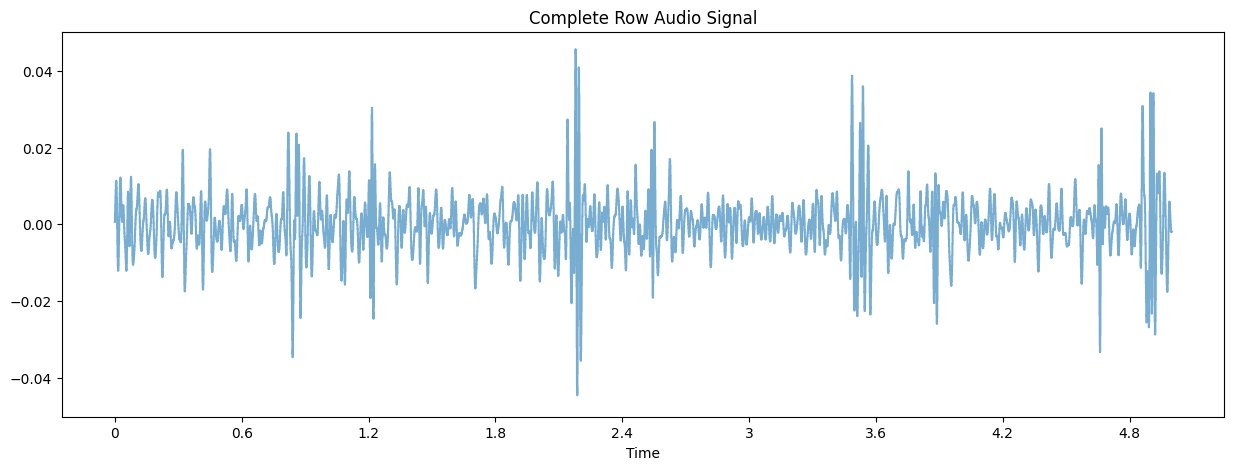

In [8]:
# Visualizing one signal of SLICIED_SIGNALS:
# Normal Signal:
visualize_signal(signals=SLICIED_SIGNALS, index=0, sr=c.SAMPLING_RATE)

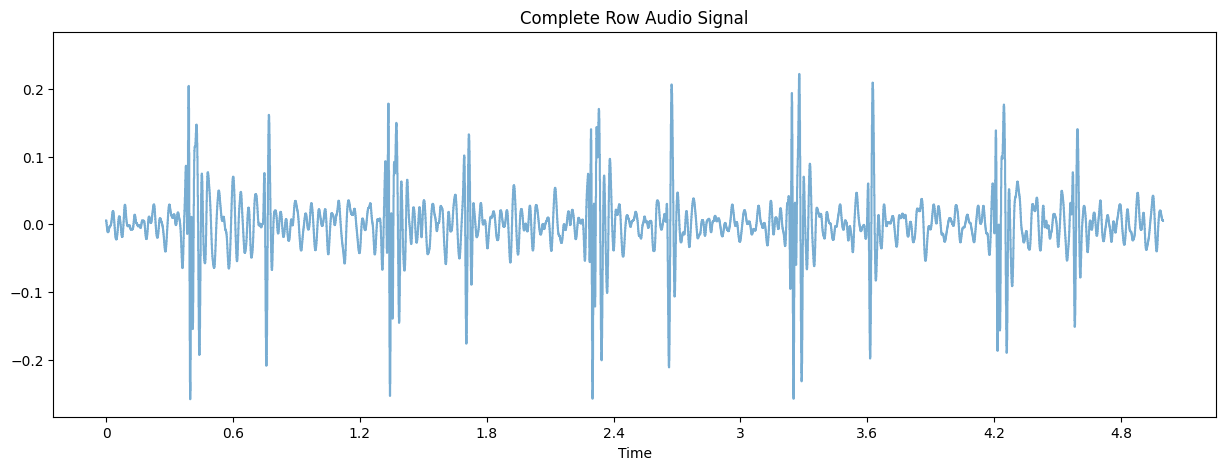

In [9]:
# Abnormal Signal:
visualize_signal(signals=SLICIED_SIGNALS, index=51, sr=c.SAMPLING_RATE)